In [1]:
#import all realated libraries
# import libraries for data analysis
import numpy as np
import pandas as pd

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import pickle and json file for columns and model file
import pickle
import json

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# import pandas profiling for making eda report
from pandas_profiling import ProfileReport 

# library for model selection and models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# impory library for scaling purpose
from sklearn.preprocessing import StandardScaler

# evaluation metrics for classification model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# import libraries for feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif, VarianceThreshold
from skfeature.function.similarity_based import fisher_score

# import libraries for balancing the data
from imblearn.over_sampling import SMOTE

# full display
pd.set_option("display.max_columns",None)

## Step-1(Problem statement)

It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.

__Independent features/attribute__
1. RowNumber
2. CustomerId
3. Surname
4. CreditScore
4. Geography
5. Gender
6. Age
7. Tenure
8. Balance
9. NumOfProducts
10. HasCrCard
11. IsActiveMember
12. EstimatedSalary

__Dependent feature/attribute__

13. Exited

Bases upon independent feature we have to predict the customer will exited or not.

## Step-2(Data gathering)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.sample(5) # check randomly 5 rows from the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2329,2330,15639415,Thompson,850,France,Male,35,3,162442.35,1,1,0,183566.78,0
650,651,15730447,Anderson,629,France,Female,49,4,0.00,2,1,1,196335.48,0
6294,6295,15742824,Isayeva,696,Germany,Male,42,7,162318.61,1,1,0,121061.89,0
4534,4535,15629475,Clark,656,France,Male,41,2,0.00,2,1,0,158973.77,0
2046,2047,15733429,Chou,520,Germany,Male,34,8,120018.86,2,1,1,343.38,0


In [4]:
# make backup of data
df1 = df.copy()

## Step-3(__EDA or Data validation__)

Here we will check the null values dublicated rows and correlation of columns to each other by using three method
1. Univariate analysis(we check one by one column)
2. Bivariate analysis(we check here correlation between two column)
3. Multivariate analysis( we check here the correlation of Independet feature from Dependent feature)

### Univariate analysis

In [5]:
df1.info() # we take thge information about data typoe of features and null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df_stat = df1.select_dtypes(exclude = "object") # here we remove the object data type column and store into new data frame

In [7]:
df_stat.describe() # here we check all the stats of the dataframe

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# we check here the uniques count of every column 
for col in df1.columns:
    c = df1[col].nunique()
    print(f"Unique count of {col} is {c}")

Unique count of RowNumber is 10000
Unique count of CustomerId is 10000
Unique count of Surname is 2932
Unique count of CreditScore is 460
Unique count of Geography is 3
Unique count of Gender is 2
Unique count of Age is 70
Unique count of Tenure is 11
Unique count of Balance is 6382
Unique count of NumOfProducts is 4
Unique count of HasCrCard is 2
Unique count of IsActiveMember is 2
Unique count of EstimatedSalary is 9999
Unique count of Exited is 2


In [10]:
# we checlk here the null count of every column
df1.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df1.duplicated().sum() # check the duplicated rows

0

In [12]:
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

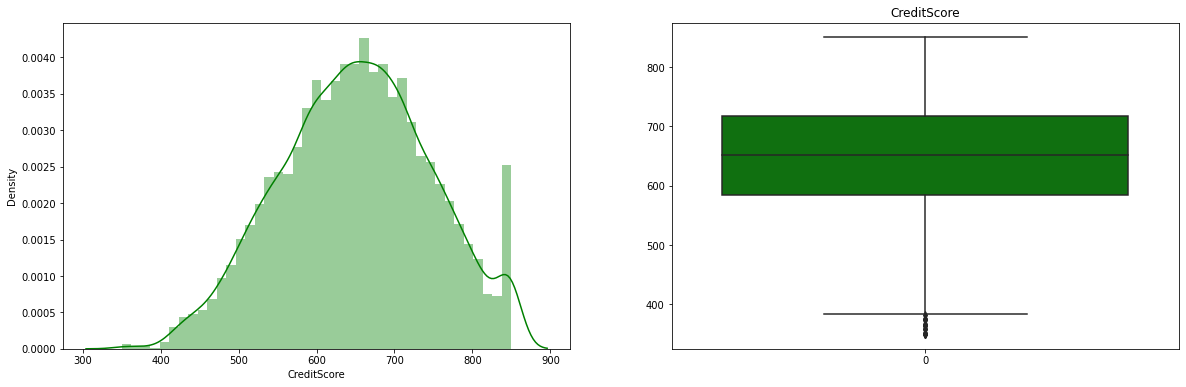

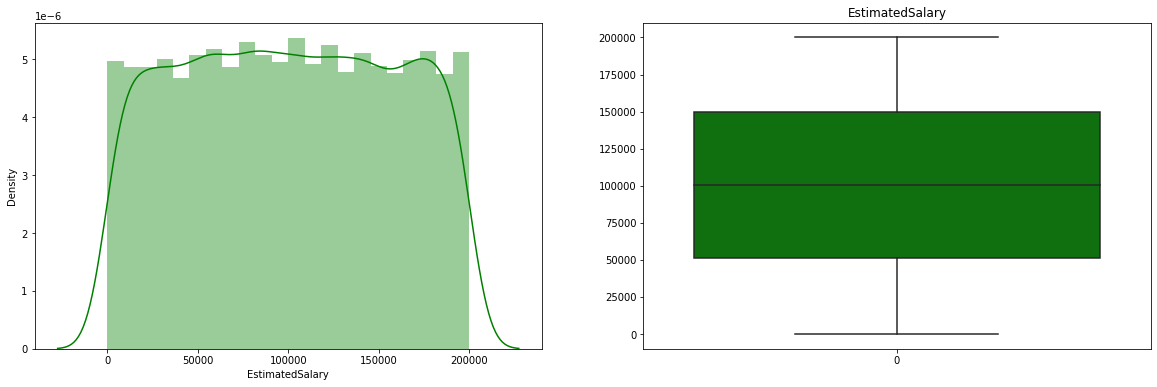

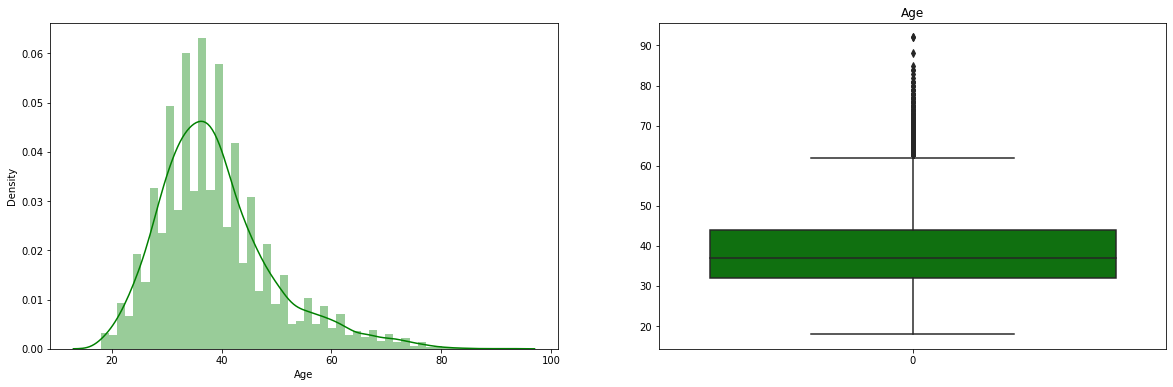

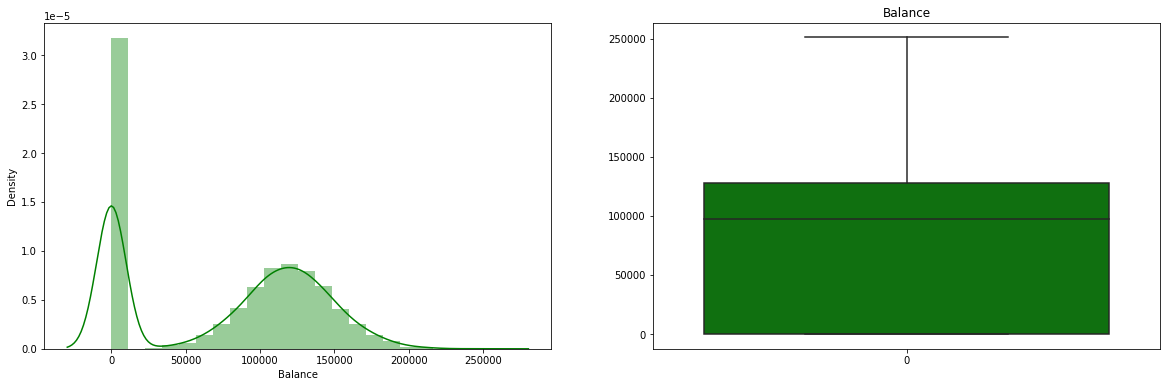

In [13]:
# here we check the distribution and outliers of continous columns.
for col in ["CreditScore","EstimatedSalary","Age","Balance"]:
    fig,ax=plt.subplots(1,2,figsize=(20,6))
    sns.distplot(df1[col],ax=ax[0],color = "g")
    sns.boxplot(df1[col],ax=ax[1],color = "g")
    plt.title(col)

In [14]:
for col in ["Geography","Gender","Tenure","NumOfProducts","NumOfProducts","HasCrCard","IsActiveMember"]:
    print(col)
    print(f"The value count of {col} is \n{df1[col].value_counts()}")
    print("*"*100)

Geography
The value count of Geography is 
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
****************************************************************************************************
Gender
The value count of Gender is 
Male      5457
Female    4543
Name: Gender, dtype: int64
****************************************************************************************************
Tenure
The value count of Tenure is 
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
****************************************************************************************************
NumOfProducts
The value count of NumOfProducts is 
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
****************************************************************************************************
NumOfProducts
The value count of NumOfProducts is 
1    5084
2    4590


Geography
AxesSubplot(0.125,0.125;0.775x0.755)


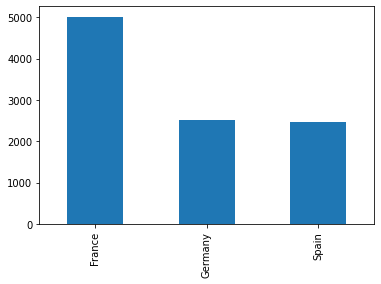

Gender
AxesSubplot(0.125,0.125;0.775x0.755)


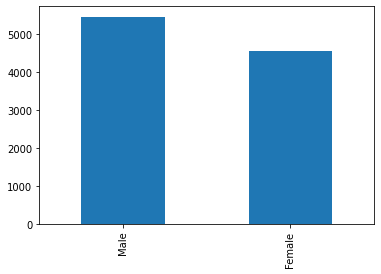

Tenure
AxesSubplot(0.125,0.125;0.775x0.755)


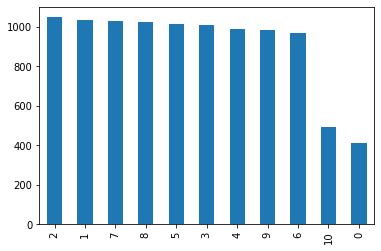

NumOfProducts
AxesSubplot(0.125,0.125;0.775x0.755)


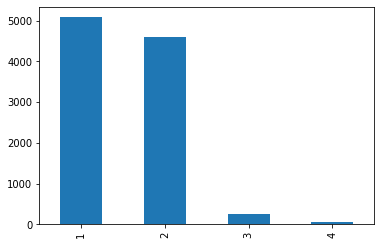

NumOfProducts
AxesSubplot(0.125,0.125;0.775x0.755)


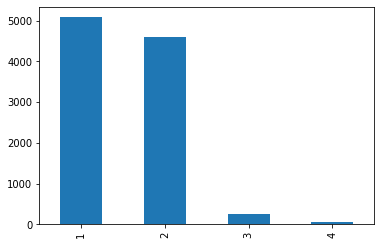

HasCrCard
AxesSubplot(0.125,0.125;0.775x0.755)


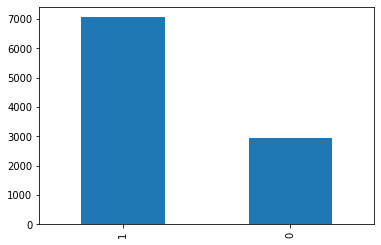

IsActiveMember
AxesSubplot(0.125,0.125;0.775x0.755)


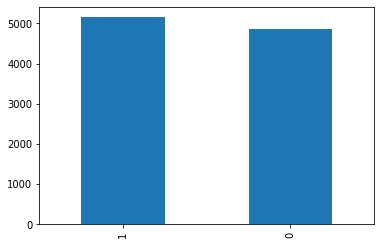

In [15]:
# count of catgorical columns
for col in ["Geography","Gender","Tenure","NumOfProducts","NumOfProducts","HasCrCard","IsActiveMember"]:
    print(col)
    print(df1[col].value_counts().plot(kind = "bar"))
    plt.show()

In [16]:
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Bivariate analysis

In [17]:
# max credit score for both of the gender
df1.groupby("Gender")["CreditScore"].max()

Gender
Female    850
Male      850
Name: CreditScore, dtype: int64

In [18]:
# how many people have credit card or not gender wise
df1.groupby(["Gender","HasCrCard"])["HasCrCard"].count()

Gender  HasCrCard
Female  0            1351
        1            3192
Male    0            1594
        1            3863
Name: HasCrCard, dtype: int64

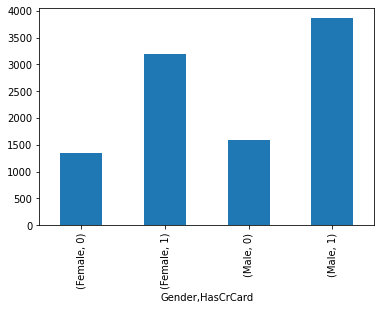

In [19]:
df1.groupby(["Gender","HasCrCard"])["HasCrCard"].count().plot(kind = "bar")# showing by graph
plt.show()

In [20]:
df1["Exited"].value_counts() # check balance of target column

0    7963
1    2037
Name: Exited, dtype: int64

In [21]:
7963/(7963+2037)  # 79% data is from 0 class 

0.7963

In [22]:
2037/(7963+2037) # 20% data is from 1 class

0.2037

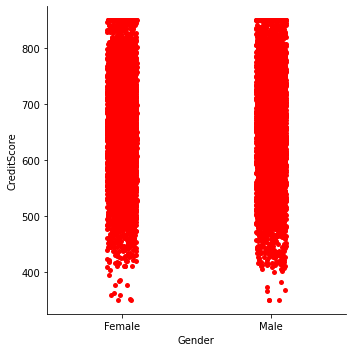

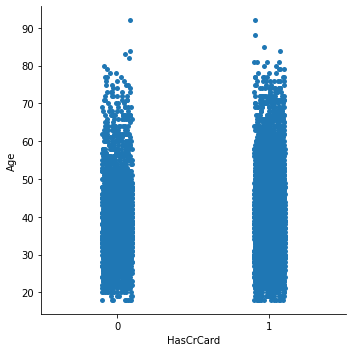

In [23]:
sns.catplot(x = "Gender" , y = "CreditScore",data = df1 ,ax = ax[0],color = "r")
sns.catplot(x = "HasCrCard",y = "Age", data = df1, ax= ax[1])

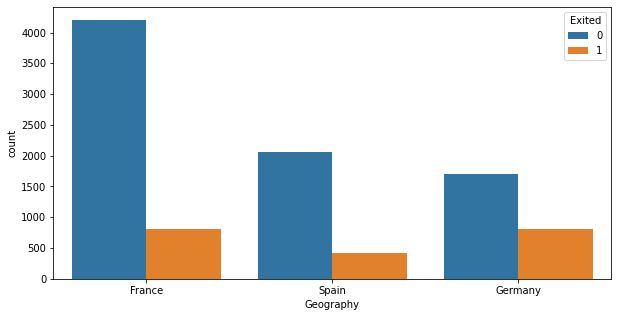

In [24]:
# we have seen here in which country maximum pepole exited
plt.figure(figsize = (10,5))
sns.countplot(data = df1 ,x = "Geography",hue = "Exited" )
plt.show()

## Step-4 (Feature engineering)

In this step we will handle the missing value and handling the outliers and change the object into numerical.

But in here we see that there is NO required of handling outliers beacuse it is real data and credit score and age can be happend at this range we will have to scaling.

In [25]:
df1.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8552,8553,15749345,Simpson,468,France,Female,22,1,76318.64,1,1,1,194783.12,0
9397,9398,15672467,Coles,766,France,Female,52,7,92510.90,2,0,1,66193.61,0
8110,8111,15751524,Chigozie,677,Germany,Female,36,10,68806.84,1,1,0,33075.24,0
7400,7401,15802071,Levi,762,Germany,Male,35,1,117458.51,1,0,1,178361.48,1
336,337,15740476,Tsao,659,Germany,Female,32,3,150923.74,2,0,1,174652.51,0


In [26]:
df1["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [27]:
# we have to replace the value of gender beacuse it is string model did not understanbd the string or object it only understand the numerical value
df1["Gender"].replace({"Female":0,"Male":1},inplace = True)

In [28]:
# by using pd.get_dummies we encode the column name
df1[["Geography__France","Geography__Germany","Geography__Spain"]]  = pd.get_dummies(df1["Geography"],prefix = "Geography_" )

In [29]:
df1.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography__France,Geography__Germany,Geography__Spain
8373,8374,15785167,Padovano,795,Spain,1,29,4,0.0,2,0,0,155711.64,0,0,0,1
3911,3912,15710527,Matthews,782,France,0,35,4,0.0,1,1,1,119565.34,0,1,0,0
5227,5228,15725767,Milani,701,France,1,23,3,0.0,2,1,0,38960.59,0,1,0,0
1019,1020,15600583,Garner,633,France,1,31,1,0.0,1,1,0,48606.71,0,1,0,0
4627,4628,15715744,Schiavone,605,France,1,39,7,0.0,1,0,1,119348.28,0,1,0,0


## Step-5(Feature selection)

We will remove those features which are not correaled with target column and which are not useful

In [30]:
# we have to remove row number,customer id and surname bacuse it has all unique values and they will not participating to predict the target column
df1.drop(["RowNumber","CustomerId","Surname"],axis = 1, inplace = True)

In [31]:
# we will drop that feature also that we do get dummies of data
df1.drop("Geography",axis = 1,inplace = True)

In [32]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography__France,Geography__Germany,Geography__Spain
1181,651,0,24,7,40224.70,1,1,1,178341.33,0,0,1,0
3380,604,0,26,3,0.00,2,1,0,155248.62,0,0,0,1
1086,712,1,36,2,100749.50,3,0,0,70758.37,1,1,0,0
2533,606,1,61,5,108166.09,2,0,1,8643.21,0,1,0,0
4272,640,0,34,3,77826.80,1,1,1,168544.85,0,0,0,1


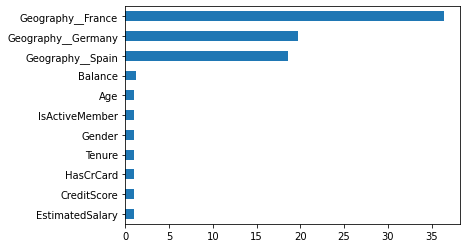

In [33]:
# variance inflation factor method for feature selection
_ = df1[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',"IsActiveMember",
       'EstimatedSalary', 'Geography__France', 'Geography__Germany',"Geography__Spain"]]
vif_lst = []

for i in range(_.shape[1]):
    vif = variance_inflation_factor(_.to_numpy(),i)
    vif_lst.append(vif)
    
s = pd.Series(vif_lst,_.columns)
s.sort_values().plot(kind = "barh")
plt.show()
# here we can see that geography is highly correlated with other independent feature

<AxesSubplot:>

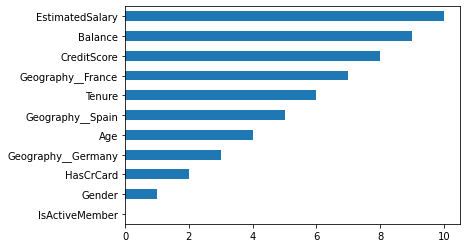

In [34]:
fisher_rank = fisher_score.fisher_score(_.to_numpy(),df1["Exited"])
s = pd.Series(fisher_rank, index = _.columns)
s.sort_values().plot(kind = "barh")

In [35]:
# chi2 method for feature selection
_temp = df1[['Gender', 'Tenure', 'HasCrCard', 'IsActiveMember', 'Geography__France',
        'Geography__Germany', 'Geography__Spain']]
chi, p_val = chi2(_temp,df1["Exited"])
s = pd.DataFrame({"Chi2":np.around(chi,2), "P_val": np.around(p_val,2)}, index = _temp.columns)
s

,Chi2,P_val
Gender,51.54,0.00
Tenure,3.27,0.07
HasCrCard,0.15,0.70
IsActiveMember,118.20,0.00
Geography__France,54.92,0.00
Geography__Germany,225.46,0.00
Geography__Spain,20.87,0.00


In [36]:
# variance threshold method for checking the faetures
var_th = VarianceThreshold(threshold = 0.0)
var_th.fit_transform(_)
s = pd.Series(var_th.get_support(),index = _.columns)
s

CreditScore           True
Gender                True
Age                   True
Tenure                True
Balance               True
HasCrCard             True
IsActiveMember        True
EstimatedSalary       True
Geography__France     True
Geography__Germany    True
Geography__Spain      True
dtype: bool

In [37]:
_temp = df1[['Age', 'Balance', 'CreditScore', 'EstimatedSalary']]
f_val,p_val = f_classif(_temp,df1["Exited"])
pd.DataFrame({"F_Val": np.around(f_val,2), "P_val": np.around(p_val,2)},index = _temp.columns)

,F_Val,P_val
Age,886.06,0.00
Balance,142.47,0.00
CreditScore,7.34,0.01
EstimatedSalary,1.46,0.23


based upon this we can go for all the fatures 

## Step-6(Model-Selection)

In [38]:
x = df1.drop("Exited",axis = 1)
y = df1["Exited"]

In [39]:
sm = SMOTE(sampling_strategy=0.75)
x1,y1 = sm.fit_resample(x,y)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.2 ,random_state = 45,stratify = y1)

In [41]:
scl = StandardScaler()
arr = scl.fit_transform(x_train)
x1_train  = pd.DataFrame(arr, columns = x_train.columns)

In [42]:
x1_test = scl.transform(x_test)

## Step-7(Model Training)

In [43]:
def get_accuracy(model_name):
    model         = model_name
    model.fit(x1_train,y_train)
    y_pred_train  = model.predict(x1_train)
    ac_score_tr   = accuracy_score(y_train,y_pred_train)
    conf_mT_tr    = confusion_matrix(y_train,y_pred_train)
    cls_report_tr = classification_report(y_train,y_pred_train)
    
    y_pred_test   = model.predict(x1_test)
    ac_score_te   = accuracy_score(y_test,y_pred_test)
    conf_mT_te    = confusion_matrix(y_test,y_pred_test)
    cls_report_te = classification_report(y_test,y_pred_test)
    
    return print(f"ac_score_tr\n {ac_score_tr} conf_mT_tr\n {conf_mT_tr} cls_report_tr\n {cls_report_tr} ac_score_te\n {ac_score_te} conf_mT_te\n {conf_mT_te} cls_report_te\n {cls_report_te}")

In [44]:
for model_name,model in [("LogisticRegression",LogisticRegression()),("DecisionTreeClassifier",DecisionTreeClassifier()),("RandomForestClassifier",RandomForestClassifier()),("XGBClassifier",XGBClassifier()),
                         ("KNeighborsClassifier",KNeighborsClassifier()),("svc",SVC()),("AdaBoostClassifier",AdaBoostClassifier())]:
    print(model_name)
    print(get_accuracy(model))
    print("*"*100)

LogisticRegression
ac_score_tr
 0.8160208109077861 conf_mT_tr
 [[5656  714]
 [1337 3441]] cls_report_tr
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      6370
           1       0.83      0.72      0.77      4778

    accuracy                           0.82     11148
   macro avg       0.82      0.80      0.81     11148
weighted avg       0.82      0.82      0.81     11148
 ac_score_te
 0.8012199497667744 conf_mT_te
 [[1388  205]
 [ 349  845]] cls_report_te
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      1593
           1       0.80      0.71      0.75      1194

    accuracy                           0.80      2787
   macro avg       0.80      0.79      0.79      2787
weighted avg       0.80      0.80      0.80      2787

None
****************************************************************************************************
DecisionTreeClassifier
ac_score_tr
 1.0 conf_mT_t

## Step-8(Model evaluation)
                            

In [45]:
# as we seen that support vector machine gives best accuracy no underfittion and overfitting problem occur
svm = SVC()
svm.fit(x1_train,y_train)

SVC()

In [46]:
# for finding the accruracy of training 
y_pred_train  = svm.predict(x1_train)
ac_score_tr   = accuracy_score(y_train,y_pred_train)
print("ac_score_tr",ac_score_tr)
conf_mT_tr    = confusion_matrix(y_train,y_pred_train)
print("conf_mT_tr\n",conf_mT_tr)
cls_report_tr = classification_report(y_train,y_pred_train)
print("cls_report_tr\n",cls_report_tr)

ac_score_tr 0.8693936132041622
conf_mT_tr
 [[5918  452]
 [1004 3774]]
cls_report_tr
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      6370
           1       0.89      0.79      0.84      4778

    accuracy                           0.87     11148
   macro avg       0.87      0.86      0.86     11148
weighted avg       0.87      0.87      0.87     11148



In [47]:
# Testing accuracy
y_pred_test   = svm.predict(x1_test)
ac_score_te   = accuracy_score(y_test,y_pred_test)
print("ac_score_te",ac_score_te)
conf_mT_te    = confusion_matrix(y_test,y_pred_test)
print("conf_mT_te\n",conf_mT_te)
cls_report_te = classification_report(y_test,y_pred_test)
print("cls_report_te\n",cls_report_te)

ac_score_te 0.852529601722282
conf_mT_te
 [[1449  144]
 [ 267  927]]
cls_report_te
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1593
           1       0.87      0.78      0.82      1194

    accuracy                           0.85      2787
   macro avg       0.85      0.84      0.85      2787
weighted avg       0.85      0.85      0.85      2787



## Step-9 (Model deployment)

In [48]:
x1_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography__France',
       'Geography__Germany', 'Geography__Spain'],
      dtype='object')

In [49]:
column_list = {"columns":list(x1_train.columns),
               "Gender":{"Female":0,"Male":1}}

In [50]:
# export model file
with open ("model.pkl","wb") as f:
    pickle.dump(svm,f)

In [51]:
# export scaling file
with open ("scaling.pkl", "wb") as f:
    pickle.dump(scl,f)

In [52]:
# exporting the column names
with open ("column.json","w") as f:
    json.dump(column_list,f)